## Import Libraries

In [1]:
import numpy as np
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install torchinfo
import torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit/

/content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit


## Data Transformations

We first start with defining our data transformations.

In [6]:
# Train Phase transformations
train_transforms_1 = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms_1 = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Dataset and Creating Train/Test Split

In [7]:
train_1 = datasets.MNIST('./data', train=True, download=True, transform=train_transforms_1)
test_1 = datasets.MNIST('./data', train=False, download=True, transform=test_transforms_1)

## Dataloader Arguments & Test/Train Dataloaders

In [8]:
SEED = 11

# Check if CUDA is available
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [9]:
# dataloader arguments - something we'll fetch these from cmdprmt
dataloader_args_1 = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader_1 = torch.utils.data.DataLoader(train_1, **dataloader_args_1)

# test dataloader
test_loader_1 = torch.utils.data.DataLoader(test_1, **dataloader_args_1)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [10]:
# Import the custom module "utils"
import utils
# Import specific components from the "utils" module
from utils import display_train_data, display_multiple_images, display_model_stats, show_image_by_index

In [11]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data_1 = train_1.train_data
train_data_1 = train_1.transform(train_data_1.numpy())

display_train_data(train_data_1)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (28, 60000, 28)
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


In [12]:
images1, labels1 = next(iter(train_loader_1))

print(images1.shape)
print(labels1.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


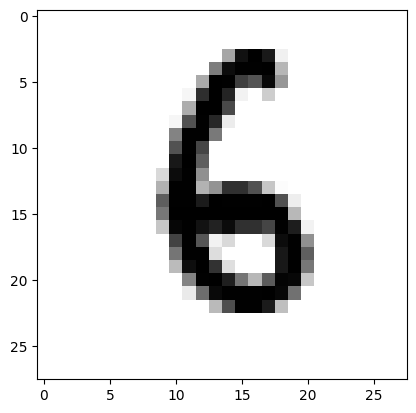

In [13]:
show_image_by_index(images1, 0)

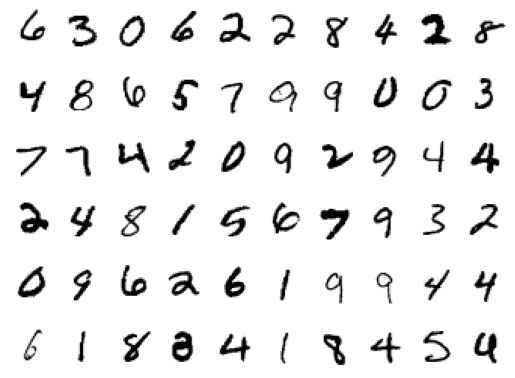

In [14]:
display_multiple_images(images1, 60)

#### It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [15]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [16]:
# Import "model" module and specific components from the "model" module
import model
from model import Model_1, Model_2, train, test

### Model-1 - Structuring Model

In [17]:
model1 = Model_1().to(device)
model1.summary(input_size=(1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model_1                                  [1, 28, 28]               [1, 10]                   --                             --
├─Sequential: 1-1                        [1, 28, 28]               [32, 26, 26]              --                             --
│    └─Conv2d: 2-1                       [1, 28, 28]               [32, 26, 26]              288                         0.15%
│    └─ReLU: 2-2                         [32, 26, 26]              [32, 26, 26]              --                             --
├─Sequential: 1-2                        [32, 26, 26]              [64, 24, 24]              --                             --
│    └─Conv2d: 2-3                       [32, 26, 26]              [64, 24, 24]              18,432                      9.46%
│    └─ReLU: 2-4                         [64, 24, 24]              [64, 24, 24]              --                

In [18]:
optimizer1 = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss1, train_acc1 = train(model1, device, train_loader_1, optimizer1, epoch)
    test_loss1, test_acc1 = test(model1, device, test_loader_1)

EPOCH: 0


Loss=2.299363851547241 Batch_id=468 Accuracy=14.11: 100%|██████████| 469/469 [00:18<00:00, 24.72it/s]



Test set: Average loss: 2.2998, Accuracy: 977/10000 (9.77%)

EPOCH: 1


Loss=0.2460414320230484 Batch_id=468 Accuracy=76.74: 100%|██████████| 469/469 [00:18<00:00, 25.73it/s]



Test set: Average loss: 0.1875, Accuracy: 9419/10000 (94.19%)

EPOCH: 2


Loss=0.07343351095914841 Batch_id=468 Accuracy=95.34: 100%|██████████| 469/469 [00:18<00:00, 24.94it/s]



Test set: Average loss: 0.0883, Accuracy: 9746/10000 (97.46%)

EPOCH: 3


Loss=0.10515037924051285 Batch_id=468 Accuracy=97.14: 100%|██████████| 469/469 [00:18<00:00, 25.60it/s]



Test set: Average loss: 0.0684, Accuracy: 9781/10000 (97.81%)

EPOCH: 4


Loss=0.047028686851263046 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:18<00:00, 25.68it/s]



Test set: Average loss: 0.0707, Accuracy: 9763/10000 (97.63%)

EPOCH: 5


Loss=0.03864511474967003 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0563, Accuracy: 9819/10000 (98.19%)

EPOCH: 6


Loss=0.00507882097736001 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:18<00:00, 25.74it/s]



Test set: Average loss: 0.0660, Accuracy: 9781/10000 (97.81%)

EPOCH: 7


Loss=0.03741179406642914 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:19<00:00, 23.65it/s]



Test set: Average loss: 0.0470, Accuracy: 9846/10000 (98.46%)

EPOCH: 8


Loss=0.13318981230258942 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:19<00:00, 23.96it/s]



Test set: Average loss: 0.0510, Accuracy: 9817/10000 (98.17%)

EPOCH: 9


Loss=0.043974678963422775 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]



Test set: Average loss: 0.0463, Accuracy: 9853/10000 (98.53%)

EPOCH: 10


Loss=0.05374769866466522 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:19<00:00, 24.52it/s]



Test set: Average loss: 0.0417, Accuracy: 9872/10000 (98.72%)

EPOCH: 11


Loss=0.07424096018075943 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:20<00:00, 23.09it/s]



Test set: Average loss: 0.0404, Accuracy: 9856/10000 (98.56%)

EPOCH: 12


Loss=0.014487729407846928 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:18<00:00, 25.15it/s]



Test set: Average loss: 0.0459, Accuracy: 9851/10000 (98.51%)

EPOCH: 13


Loss=0.04672249034047127 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:20<00:00, 22.85it/s]



Test set: Average loss: 0.0508, Accuracy: 9846/10000 (98.46%)

EPOCH: 14


Loss=0.007174560334533453 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:18<00:00, 25.46it/s]



Test set: Average loss: 0.0417, Accuracy: 9865/10000 (98.65%)



In [19]:
train_losses1 = [t.cpu().item() for t in train_loss1]

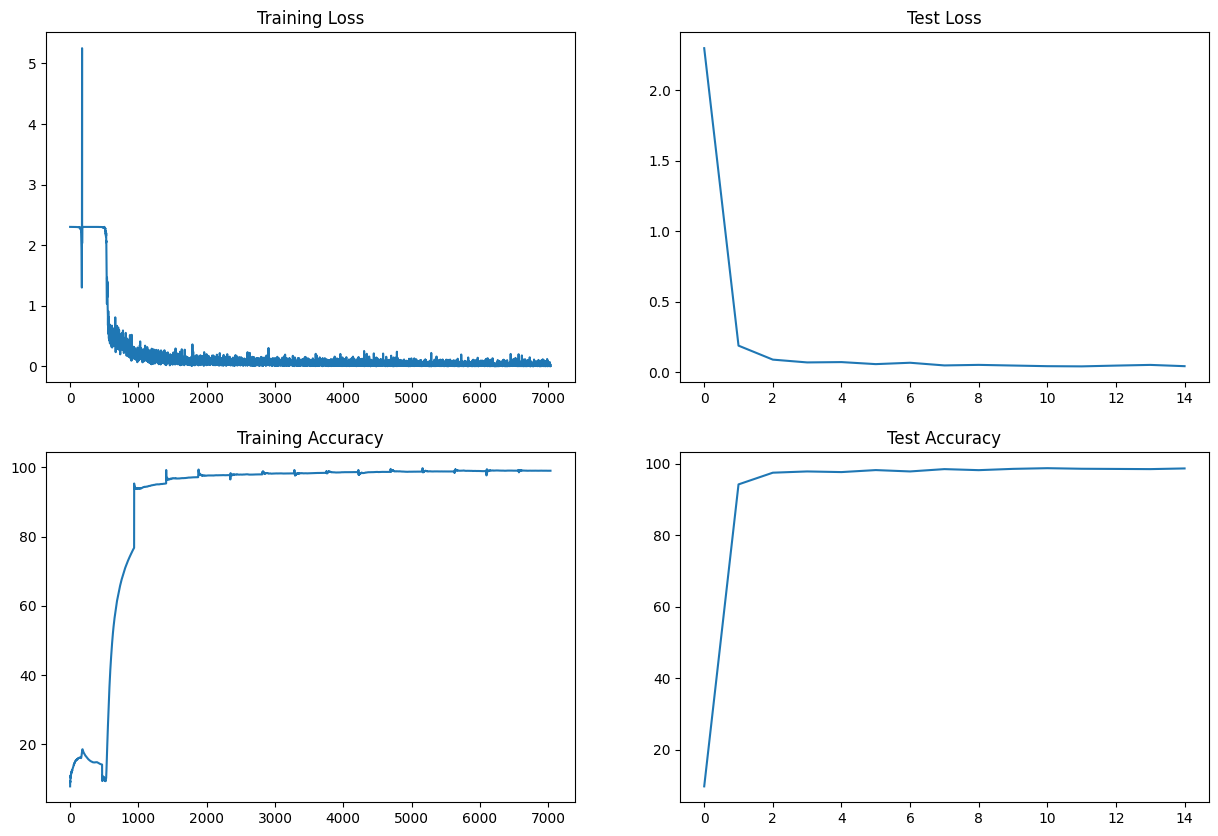

In [20]:
display_model_stats(train_losses1, train_acc1, test_loss1, test_acc1)

### Model-2 - Model Skeleton

In [17]:
model2 = Model_2().to(device)
summary(model2, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,608
              ReLU-4           [-1, 32, 24, 24]               0
            Conv2d-5           [-1, 10, 24, 24]             320
         MaxPool2d-6           [-1, 10, 12, 12]               0
            Conv2d-7           [-1, 16, 10, 10]           1,440
              ReLU-8           [-1, 16, 10, 10]               0
            Conv2d-9             [-1, 32, 8, 8]           4,608
             ReLU-10             [-1, 32, 8, 8]               0
           Conv2d-11             [-1, 16, 6, 6]           4,608
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 16, 6, 6]           2,304
             ReLU-14             [-1, 1

In [18]:
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss2, train_acc2 = train(model2, device, train_loader_1, optimizer2, epoch)
    test_loss2, test_acc2 = test(model2, device, test_loader_1)

EPOCH: 0


Loss=2.302091598510742 Batch_id=468 Accuracy=11.50: 100%|██████████| 469/469 [00:17<00:00, 26.80it/s]



Test set: Average loss: 2.3019, Accuracy: 974/10000 (9.74%)

EPOCH: 1


Loss=0.6158413290977478 Batch_id=468 Accuracy=25.24: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]



Test set: Average loss: 0.4844, Accuracy: 8450/10000 (84.50%)

EPOCH: 2


Loss=0.20123310387134552 Batch_id=468 Accuracy=91.63: 100%|██████████| 469/469 [00:17<00:00, 26.39it/s]



Test set: Average loss: 0.1310, Accuracy: 9571/10000 (95.71%)

EPOCH: 3


Loss=0.05686035379767418 Batch_id=468 Accuracy=95.81: 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]



Test set: Average loss: 0.0878, Accuracy: 9714/10000 (97.14%)

EPOCH: 4


Loss=0.06655886769294739 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:17<00:00, 26.41it/s]



Test set: Average loss: 0.0666, Accuracy: 9793/10000 (97.93%)

EPOCH: 5


Loss=0.02183626778423786 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:17<00:00, 26.80it/s]



Test set: Average loss: 0.0658, Accuracy: 9801/10000 (98.01%)

EPOCH: 6


Loss=0.04786039888858795 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.0568, Accuracy: 9824/10000 (98.24%)

EPOCH: 7


Loss=0.008045871742069721 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:17<00:00, 26.23it/s]



Test set: Average loss: 0.0548, Accuracy: 9826/10000 (98.26%)

EPOCH: 8


Loss=0.03560507670044899 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:20<00:00, 22.49it/s]



Test set: Average loss: 0.0453, Accuracy: 9864/10000 (98.64%)

EPOCH: 9


Loss=0.046752337366342545 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]



Test set: Average loss: 0.0423, Accuracy: 9870/10000 (98.70%)

EPOCH: 10


Loss=0.028496302664279938 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:17<00:00, 26.32it/s]



Test set: Average loss: 0.0429, Accuracy: 9863/10000 (98.63%)

EPOCH: 11


Loss=0.02552054636180401 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:18<00:00, 25.49it/s]



Test set: Average loss: 0.0377, Accuracy: 9884/10000 (98.84%)

EPOCH: 12


Loss=0.10189125686883926 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]



Test set: Average loss: 0.0421, Accuracy: 9869/10000 (98.69%)

EPOCH: 13


Loss=0.138572558760643 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:18<00:00, 25.98it/s]



Test set: Average loss: 0.0350, Accuracy: 9899/10000 (98.99%)

EPOCH: 14


Loss=0.04579690471291542 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:17<00:00, 26.38it/s]



Test set: Average loss: 0.0330, Accuracy: 9899/10000 (98.99%)



In [19]:
train_losses2 = [t.cpu().item() for t in train_loss2]

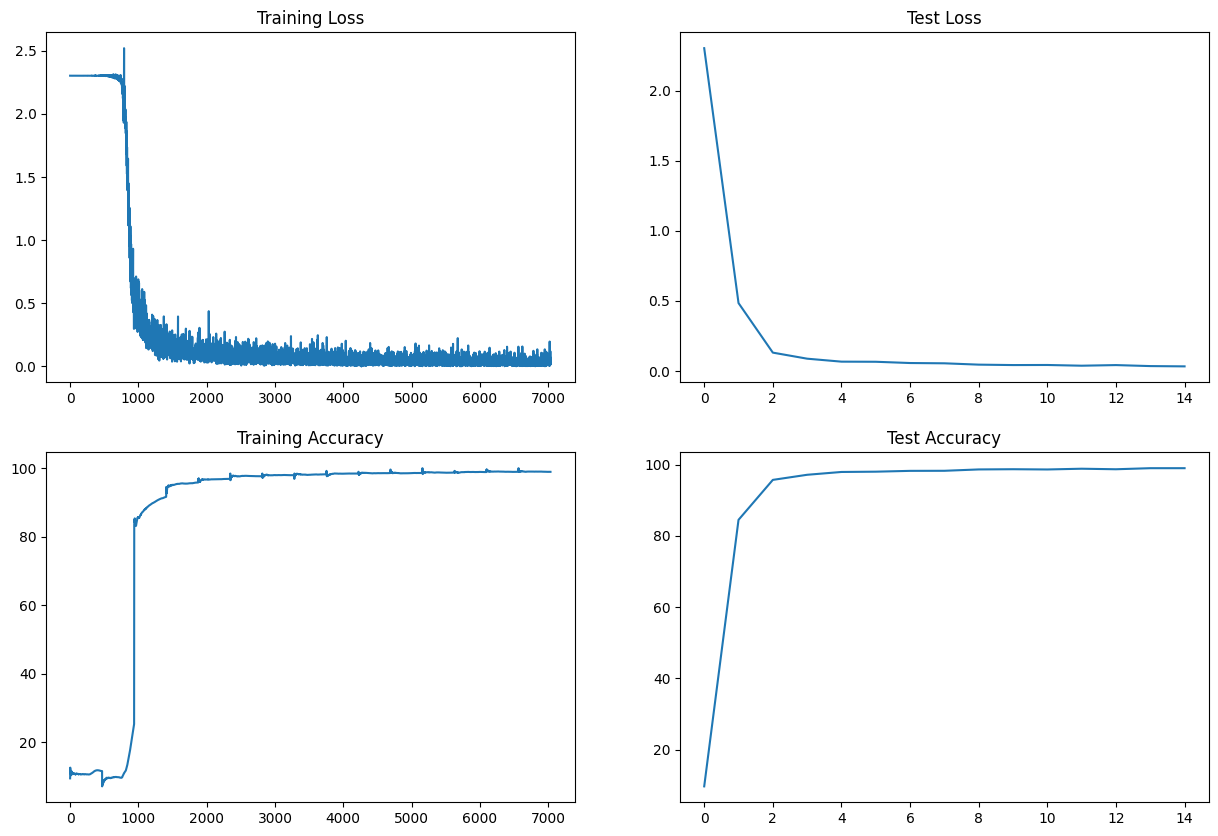

In [20]:
display_model_stats(train_losses2, train_acc2, test_loss2, test_acc2)

#### Code Block - Model Structure


**Target:**

- Get the set-up right
- Set Transforms
- Set Data Loader
- Set Basic Working Code
- Set Basic Training  & Test Loop
- Modularize Code

**Results:**

- Parameters: 194.884K
- Best Training Accuracy: 99.01%
- Best Test Accuracy: 98.72%

**Analysis:**

- Extremely Heavy Model for the given problem
- Model is over-fitting

#### Code Block - Model Skeleton


**Targets:**

- Get the basic skeleton right. We will try and avoid changing this skeleton as much as possible.
- Add GAP
- No fancy stuff
- Perform MaxPooling at RF=5

**Results:**

- Parameters: 18.192K
- Best Train Accuracy: 98.93%
- Best Test Accuracy: 98.99%

**Analysis:**

- The model is still larger, but working.
- Accuracy is not reaching 99% and above within 15 epochs.